
# Machine Learning Example on Students Tests

## Table of Contents
<ul>
<li><a href="#intro">Problem Statement</a></li>
<li><a href="#implement">Implementation</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Problem Statement 
***
<br>

### Which factors affect a students grades

The problem that will be discussed in this paper relates to students and what facors affect their grades in exams. 

<br>

### Dataset Description 
This dataset has 1000 entries of students who took exams and information on them, their gender, their race, their parents education, their school lunch, and finally their test scores.

<br>

### Application with Machine Learning
Classifier machine learning algorithms will be applied to the dataset to predict students grades and to attempt to see which factors affect the students grade the most.





<a id='implement'></a>
## Implementation
<br>

### 1. Data Cleaning
***

In [1]:
#imports
#these will be used for to label column headers when converting from categorical data to numeric data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
#this will be used as a transformer for the naming of header columns
from sklearn.compose import make_column_transformer
#this will be used to split and randomize the dataset
from sklearn.model_selection import train_test_split
#these are the algorithms and classifiers that will be used for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
#these will be used for data reading and analysis
import pandas as pd
import numpy as np
#these will be used for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('exams.csv') #read CSV file and store in DF variable
df.head() #Display the first 5 rows of exams dataframe

,gender,race,parent_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


We can see here that all column values are categorical except the test scores, these will later need to be changed to numerical data to be able to use it with SKLearn, Also only one target variable is going to be predicted, but there are three scores, this will be tackled shortly. Before doing any of this the data will be checked for any null values, if they have any the data will need to be cleaned.

In [3]:
df.isnull().sum() #returns the count of null values in each attribute

gender                     0
race                       0
parent_education           0
lunch                      0
test_preparation_course    0
math_score                 0
reading_score              0
writing_score              0
dtype: int64

As there arent any null values, we dont need to do anything.

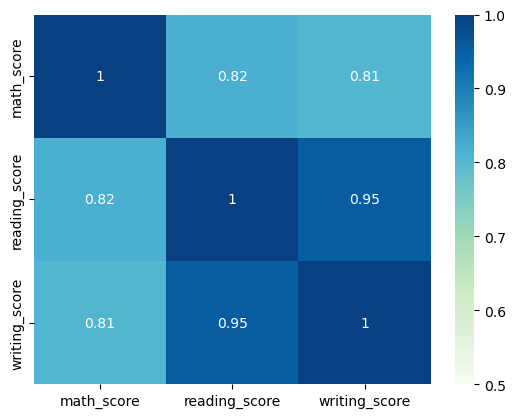

In [4]:
# Create a correlation matrix
corr = df[["math_score","reading_score","writing_score"]].corr()

# Create a heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap="GnBu",
            vmin=0.5);

From this heatmap we can see that the reading and writing scores are highly correlated at 95%, and the math correlates with them at 80%+, these numbers are high enough where it's safe to average the scores and predict the average

In [5]:
# Averageing scores and storing them in a new 'avg_score' column
df["avg_score"] = df.apply(lambda row: round((row["math_score"] + row["reading_score"] + row["writing_score"]) / 3), axis=1)
# Dropping math, reading and writing scores from the df
df.drop(['math_score', 'reading_score', 'writing_score'], axis=1, inplace=True) 
df.head()

,gender,race,parent_education,lunch,test_preparation_course,avg_score
0,male,group A,high school,standard,completed,66
1,female,group D,some high school,free/reduced,none,51
2,male,group E,some college,free/reduced,none,56
3,male,group B,high school,standard,none,74
4,male,group E,associate's degree,standard,completed,73


Only the students grade `(A,B,C,D,F)` is needed and not their exact score, and as such their scores will be converted to grades.

In [6]:
# Declare conditions, and corresponding grade categories
conditions, type_choices = (
    [
        (df["avg_score"] >= 90),
        (df["avg_score"] >= 80),
        (df["avg_score"] >= 70),
        (df["avg_score"] >= 60),
        (df["avg_score"] < 60),
    ],
        ["A", "B", "C", "D", "F"]
)

# Change score to grade (A,B,C,D,F) based on the above conditions
df["avg_score"] = np.select(conditions, type_choices, default="F")
df.head()

,gender,race,parent_education,lunch,test_preparation_course,avg_score
0,male,group A,high school,standard,completed,D
1,female,group D,some high school,free/reduced,none,F
2,male,group E,some college,free/reduced,none,F
3,male,group B,high school,standard,none,C
4,male,group E,associate's degree,standard,completed,C


### 2. Data visualization and analysis
***

In this phase, the data will be visualised and then an analysis will be made. The analysis of the visulization could show that the data needs further cleaning.

The first step will be to plot the total number of male and female students.

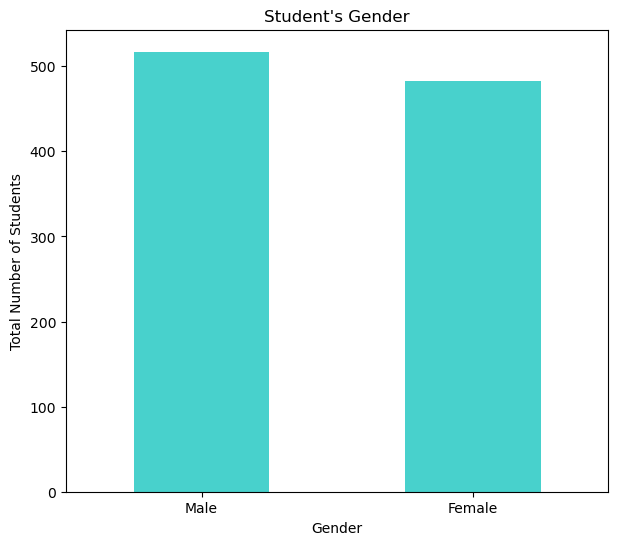

In [7]:
gender = df['gender'].value_counts() #array of the count for males and females
plt.figure(figsize=(7, 6)) #plot and figure size
ax = gender.plot(kind='bar', rot=0, color='mediumturquoise') #plotting the gender by bar plot
# Setting title, label and x ticks
ax.set_title("Student's Gender", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Total Number of Students')
ax.set_xticklabels(('Male', 'Female'));

This shows that there are slightly more male students than female students in this dataset

Now lets plot the total count of each grade to see the grade distribution, to make the plot correctly I'll need to make a mapping of the grades so all the grades get ordered from A to F, this will only be used for this plot.

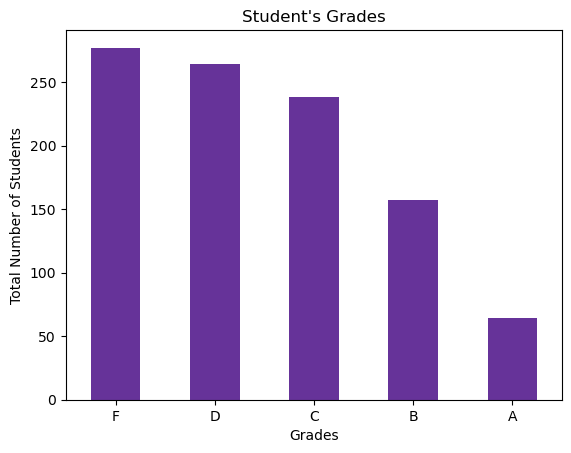

In [8]:
scores = df['avg_score'].value_counts()
ax = scores.plot(kind='bar', rot=0, color='rebeccapurple')
ax.set_title("Student's Grades", y = 1)
ax.set_xlabel('Grades')
ax.set_ylabel('Total Number of Students')
ax.set_xticklabels(('F', 'D', 'C', 'B', 'A'));

We can see here that higher grades have less number of students, the most common grade is an F or an average of failure in the courses.

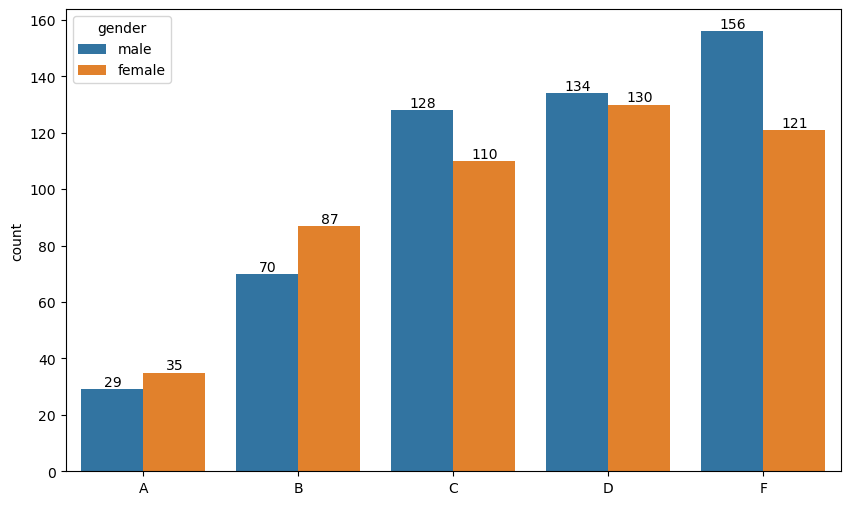

In [9]:
# Select the columns you want to plot
gender = df["gender"]
score = df["avg_score"]
# Convert the scores column to a Categorical type with an ordered list of categories
score_categorical = pd.Categorical(score, categories=["A", "B", "C", "D", "F"], ordered=True)
# Make plot bigger
plt.figure(figsize=(10,6))
# Make count plot
ax = sns.countplot(x=score_categorical, hue=gender, order=["A", "B", "C", "D", "F"])
# Get the counts for each bar
counts = df.groupby(["gender", "avg_score"]).size().reset_index(name="count")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

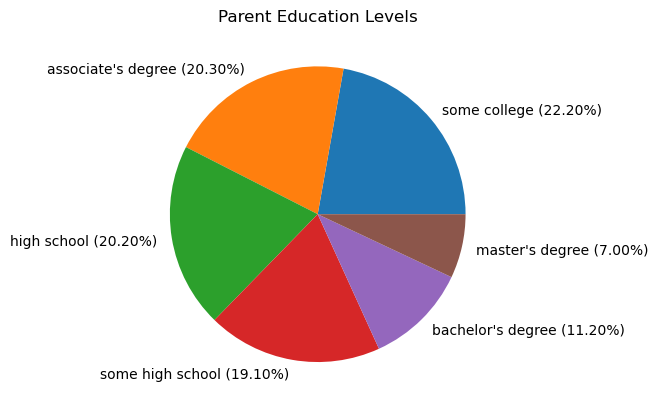

In [10]:
# Count the number of students in each parent education level
education_counts = df["parent_education"].value_counts()
# Calculate the percentages of each education level
education_percents = education_counts / education_counts.sum()
# Create a list of labels in the format "education level (percentage)"
labels = ["{} ({:.2f}%)".format(level, 100*percent) for level, percent in zip(education_counts.index, education_percents)]
# Plot the counts as a pie chart
plt.pie(education_counts, labels=labels)
# Add a title to the plot
plt.title("Parent Education Levels");

### 3. Feature Selection
***

The target feature
* average grade

The features to be learned from
* gender
* race
* parents education
* lunch
* preperation course completion

### 4. Data Preperation
***

To be able to apply the SKLearn library's machine learning algorithms the categorical data needs to be converted into numerical data. 
Starting by converting the nominal variables which are:
* Gender
* Race
* Lunch
* Test Preparation Course

These variables are not ordered and as such are qualified as categorical.

SKLearn's OneHotEncoder will be used to automatically convert the data to numerical data.

In [11]:
ohe = OneHotEncoder(sparse = False) #initilization
ohe.fit_transform(df[['gender']])[:5] #transforms gender to numerical and prints first 5 rows


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

Lets check the female/male values of the first 5 rows and compare it to the array above

In [12]:
df['gender'].head()

0      male
1    female
2      male
3      male
4      male
Name: gender, dtype: object

We can see that the `nominal_ordered` array has female as its first value and male as its seconds

Now that this was shown to work as expected, it will be applied to all nominal datatypes in our dataset

In [13]:
ohe.fit_transform(df[['gender','race','lunch','test_preparation_course']])[:5]

array([[0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.]])

In [14]:
df[['gender','race','lunch','test_preparation_course']].head()

,gender,race,lunch,test_preparation_course
0,male,group A,standard,completed
1,female,group D,free/reduced,none
2,male,group E,free/reduced,none
3,male,group B,standard,none
4,male,group E,standard,completed


In [15]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['group A', 'group B', 'group C', 'group D', 'group E'],
       dtype=object),
 array(['free/reduced', 'standard'], dtype=object),
 array(['completed', 'none'], dtype=object)]

We can see that OHE converted the data to numerical by altering the array, as the `categories_` the first two indiceses will be female and male, the next 5 will describe the race, the next two will be about the meal and the last two will be about the completion of the course. 


Now the ordinal `parents_education` is left to convert, since this is an ordered category, I will need to manuelly encode the variables to be able to order them and convert them to numerical type.

In [16]:
education = [['some high school', 'high school', 'some college', 
              'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']]
oe_edu = OrdinalEncoder(categories = education)
oe_edu.fit_transform(df[['parent_education']])[:5]

array([[1.],
       [0.],
       [2.],
       [1.],
       [3.]])

In [17]:
df['parent_education'].head()

0           high school
1      some high school
2          some college
3           high school
4    associate's degree
Name: parent_education, dtype: object

As you can see, now the parents education has been ordered and converted to numbers.

Finally, we need to do the same thing from the grades as well

In [18]:
grades = ['A','B','C','D','F']
oe_grades = OrdinalEncoder(categories = [grades])
oe_grades.fit_transform(df[['avg_score']])[:5]
 

array([[3.],
       [4.],
       [4.],
       [2.],
       [2.]])

In [19]:
df['avg_score'].head()

0    D
1    F
2    F
3    C
4    C
Name: avg_score, dtype: object

And by doing this we are finished with the data cleaning and preperation.


### 5. Machine Learning
 ***

After preparing the data, now the data has to be split into predictor variables and the target variable, as mentioned previously the target variable will be the average score, everything else will be in the predictor variables array.

In [20]:
x = df.drop('avg_score', axis = 1) #dropping grades column from original df
y = df['avg_score'] #only keeping grades column from original df

after making the predictor and target arrays, now we need to transform the values to the ordered and number values we made in the preperation phase

In [21]:
#transforming columns using the ordered array and their original column names
x_transform = make_column_transformer((ohe,['gender','race','lunch','test_preparation_course']),
                                      (oe_edu, ['parent_education']))
#applying the column transformer to the variables
x_ready = x_transform.fit_transform(x)
y_transform = make_column_transformer((oe_grades, ['avg_score']))
#y_ready = y_transform.fit_transform

In [22]:
x_ready[0]

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_ready, y,test_size = 0.3)
print('x train size: ',x_train.shape,'\t x test size: ', x_test.shape)
print('y train size: ',y_train.shape,'\t\t y test size: ', y_test.shape)

x train size:  (700, 12) 	 x test size:  (300, 12)
y train size:  (700,) 		 y test size:  (300,)


#### Classifier #1: RandomForestClassifier

In [24]:
clf_RFC = RandomForestClassifier(min_samples_split=100,n_estimators=50, min_samples_leaf=10) # making classifier object
clf_RFC.fit(x_train,y_train) # training using the classifier
RFC_score = clf_RFC.score(x_test,y_test) # testing the classifier and checking accuracy
RFC_percentage = round(RFC_score*100,1) # rounded rfc_score as a percentage 

print('Correct Predictions: ', round(RFC_score * x_test.shape[0]))
print('Incorrect Predictions: ', round((1-RFC_score) * x_test.shape[0]))
print('RandomForestClassifier Accuracy: ' + str(RFC_percentage) + '%')

Correct Predictions:  104
Incorrect Predictions:  196
RandomForestClassifier Accuracy: 34.7%


#### Classifier #2: GradientBoostingClassifier

In [25]:
clf_GBC = GradientBoostingClassifier()
clf_GBC.fit(x_train, y_train)
GBC_score = clf_GBC.score(x_test, y_test)
GBC_percentage = round(GBC_score*100,1)

print('Correct Predictions: ', round(GBC_score * x_test.shape[0]))
print('Incorrect Predictions: ', round((1-GBC_score) * x_test.shape[0]))
print('GradientBoostingClassifier Accuracy: ' + str(GBC_percentage) + '%')

Correct Predictions:  110
Incorrect Predictions:  190
GradientBoostingClassifier Accuracy: 36.7%


#### Classifer #3: AdaBoostClassifier

In [26]:
clf_ABC = AdaBoostClassifier().fit(x_train,y_train)
ABC_score = clf_ABC.score(x_test,y_test)
ABC_percentage = round(ABC_score*100,1)
print('Correct Predictions: ', round(ABC_score * x_test.shape[0]))
print('Incorrect Predictions: ', round((1-ABC_score) * x_test.shape[0]))
print('AdaBoostClassifier Accuracy: ' + str(ABC_percentage) + '%')

Correct Predictions:  101
Incorrect Predictions:  199
AdaBoostClassifier Accuracy: 33.7%


<a id='conclusion'></a>
## Conclusion
***
After applying the different classifiers, we got similar accuracy percentages but all of them were rather low accuracy percentages. The reason all the accuracies of the classifiers was low could be because the original students dataset does not have a great colleration between grades and any of its attributes, therefore none of the classifiers could get a very accurate predication for the students grades.